In [1]:
from __future__ import (division, print_function)

In [2]:
%autoreload 
%matplotlib inline


In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("white")
import sys
sys.path.append("../")

import get_gal_centroids as getg

In [8]:
peak_df = pd.read_hdf("../../data/clst20_peak_df.h5", "peak_df")

In [9]:
dom_peaks = peak_df[peak_df.peaks_dens == 1.]

In [14]:
gp = dom_peaks.groupby(["clstNo"])

In [49]:
offsets = gp.apply(lambda x: 
                   getg.compute_KDE_offsets(x.peaks_xcoords,
                                            x.peaks_ycoords))
offsets = offsets.reset_index()  # groupby clstNo 
offsets.set_index("clstNo")
offsets.columns = ["clstNo", "offsets"]

# cluster 13 with anomaly

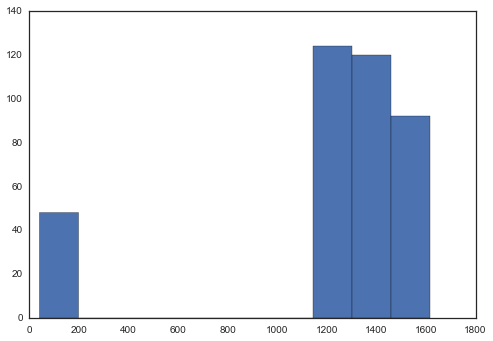

In [103]:
_ = plt.hist(offsets["offsets"][13])

shows extreme bimodal distribution ... 
maybe the geometry of the cluster is really bad.

# general distributions

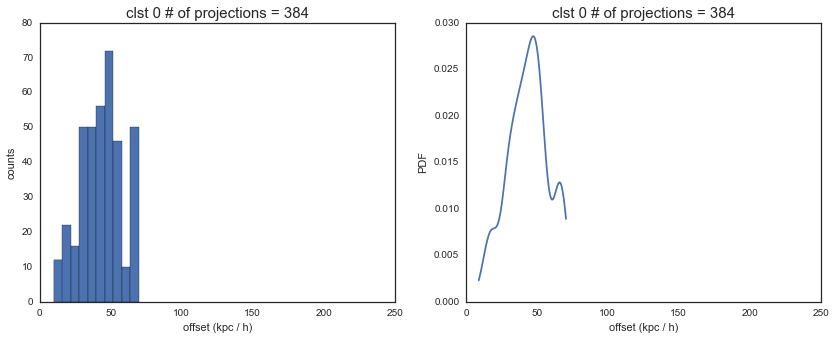

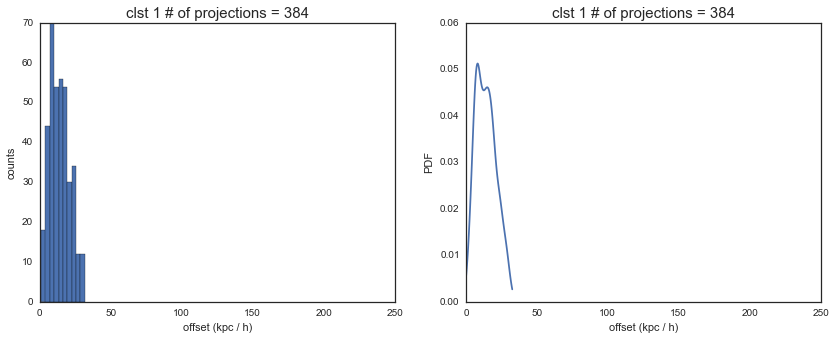

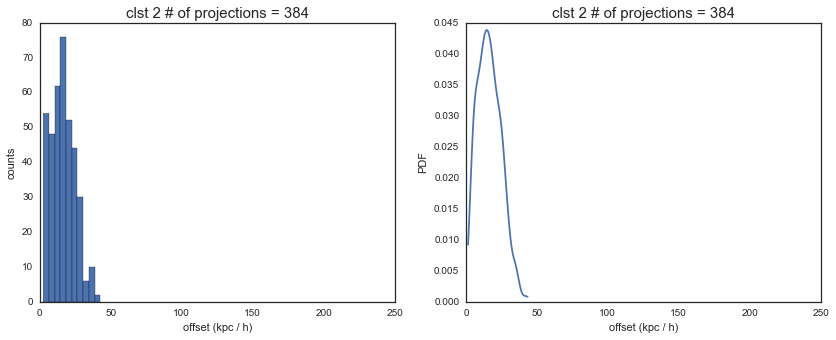

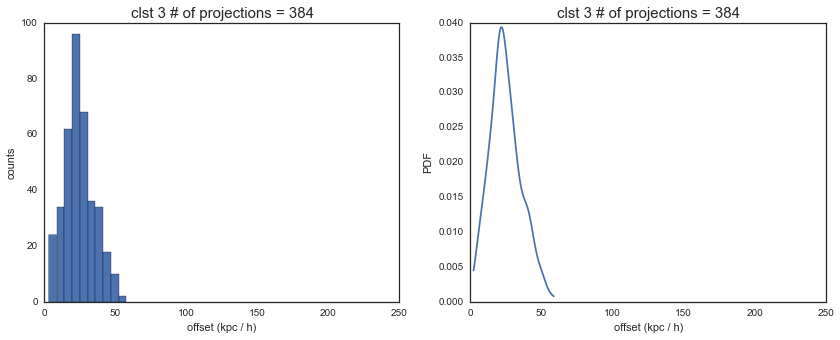

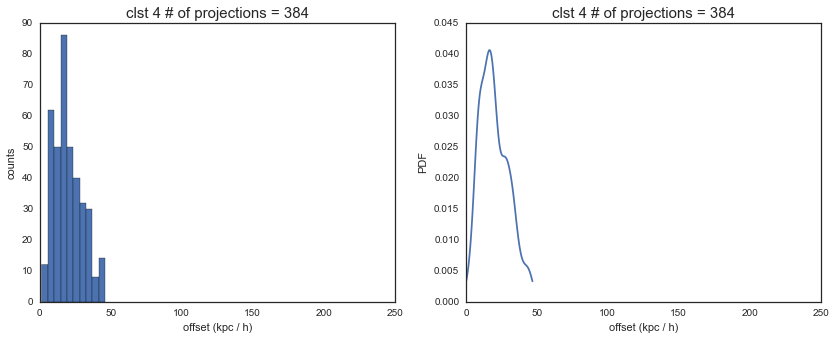

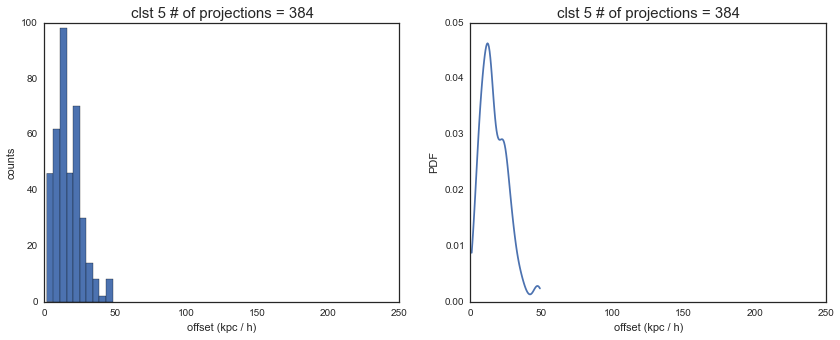

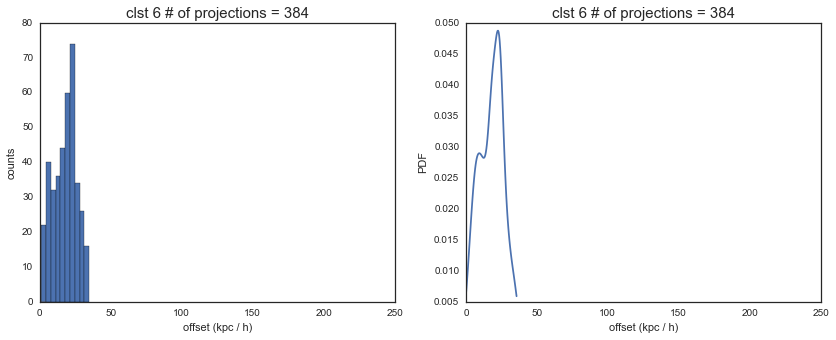

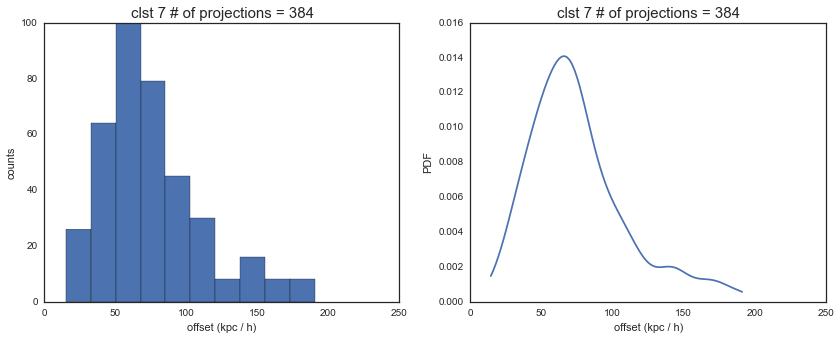

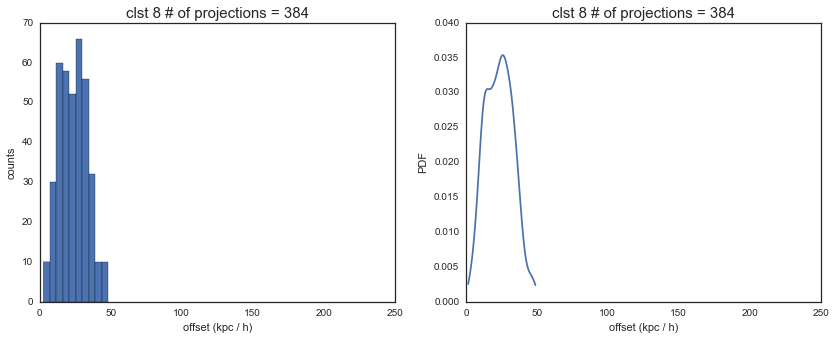

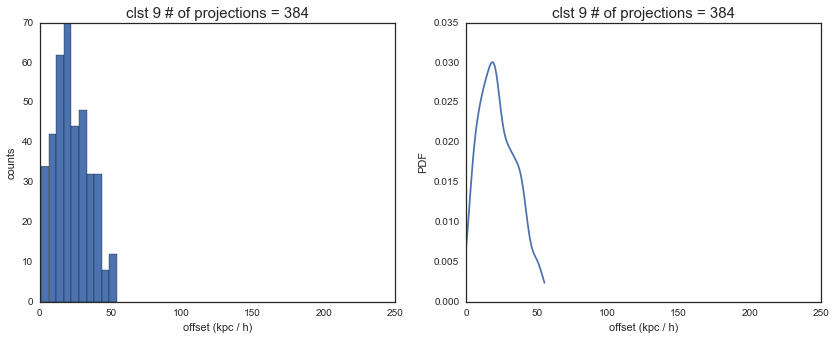

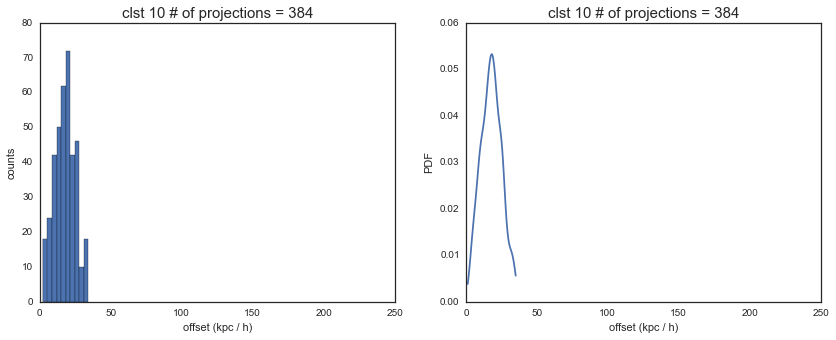

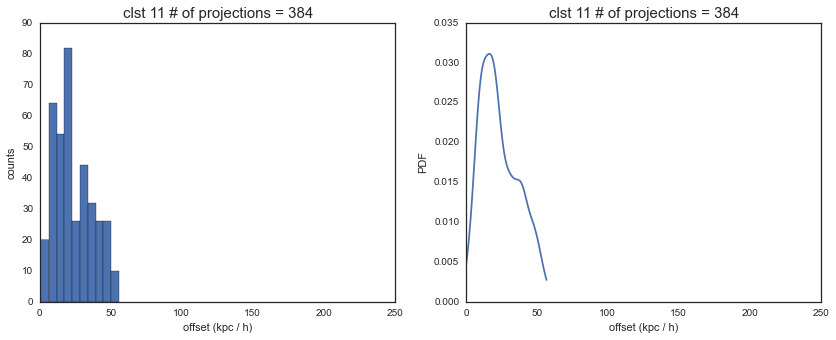

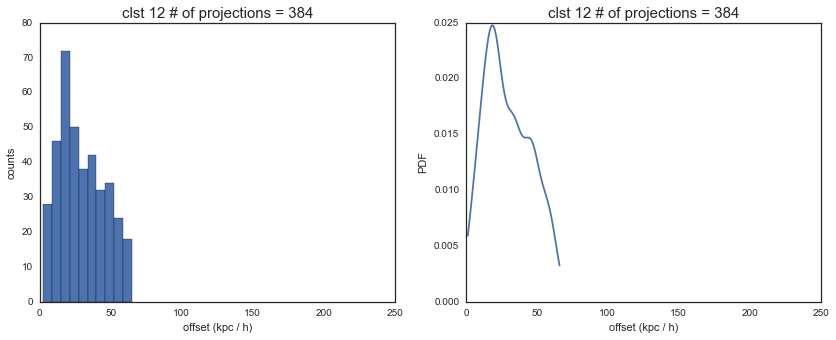

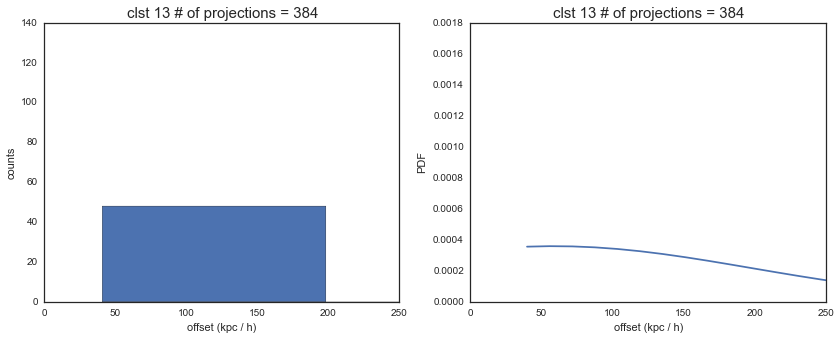

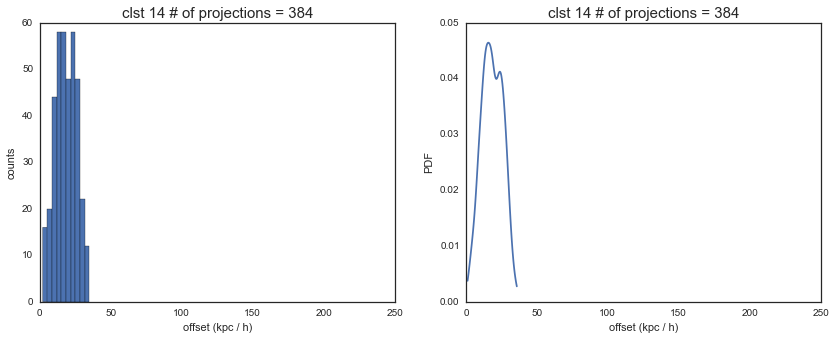

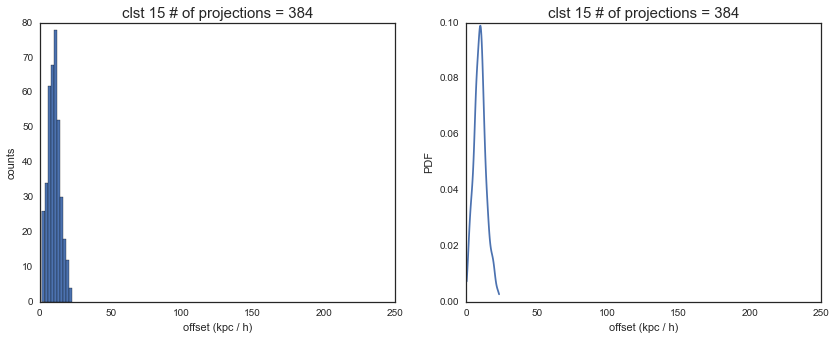

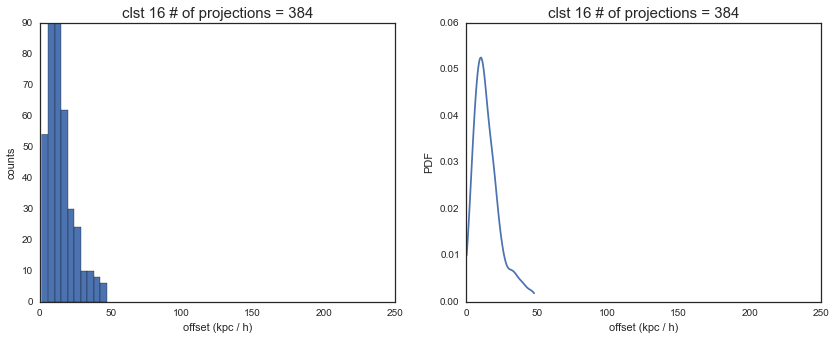

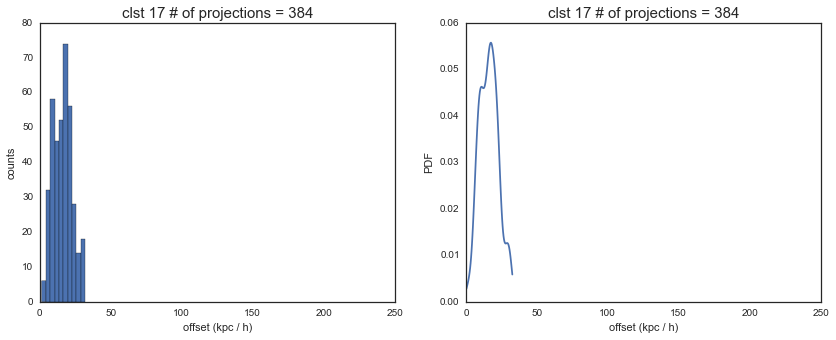

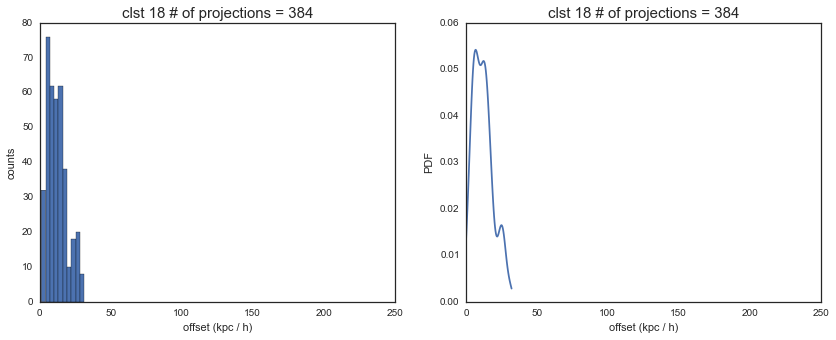

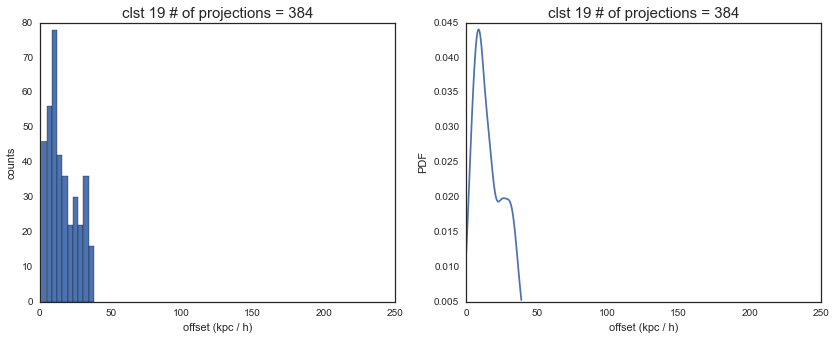

In [87]:
xlim = 250
for clstNo in offsets["clstNo"]:
    plt.clf()
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    _ = plt.hist(offsets["offsets"][clstNo])
    plt.title("clst {} # of projections = ".format(clstNo) + 
              "{}".format(len(offsets["offsets"][0])),
              size=15)
    plt.ylabel('counts')
    plt.xlabel('offset (kpc / h)')
    plt.xlim(0, xlim)
    plt.subplot(122)
    sns.kdeplot(offsets["offsets"][clstNo])
    plt.title("clst {} # of projections = ".format(clstNo) + 
              "{}".format(len(offsets["offsets"][0])),
              size=15)
    plt.ylabel('PDF')
    plt.xlabel('offset (kpc / h)')
    plt.xlim(0, xlim)
    plt.show()

In [10]:
offsets = getg.compute_KDE_offsets(dom_peaks.peaks_xcoords, 
                                   dom_peaks.peaks_ycoords)

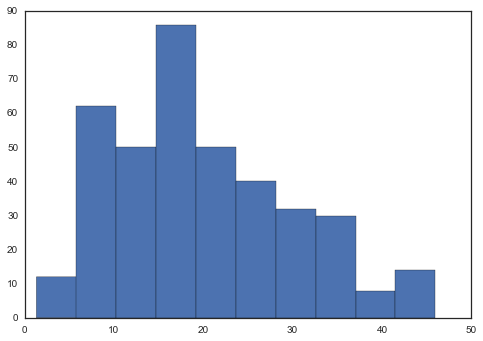

In [58]:
_ = plt.hist(offsets["offsets"][4])

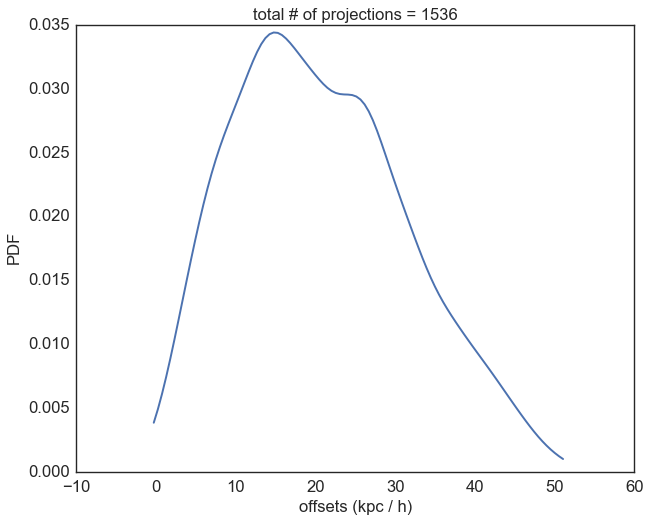

In [54]:
sns.kdeplot(offsets)
plt.ylabel("PDF", size=15)
plt.xlabel("offsets (kpc / h)", size=15)
plt.title("total # of projections = {0}".format(len(np.unique(offsets))),
          size = 15)

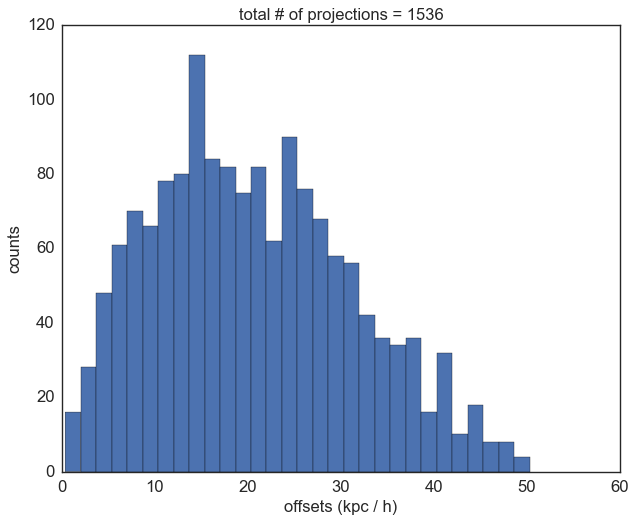

In [55]:
_ = plt.hist(offsets, bins=30)
plt.ylabel("counts", size=15)
plt.xlabel("offsets (kpc / h)", size=15)
plt.title("total # of projections = {0}".format(len(np.unique(offsets))),
          size = 15)

In [56]:
import h5py
f = h5py.File("../../data/Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [57]:
offsetsR200C = getg.compute_KDE_R200Coffsets(offsets, f, 4)

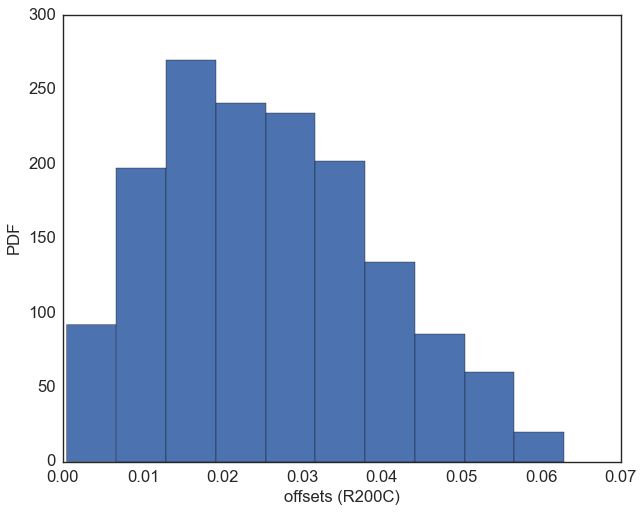

In [58]:
plt.hist(offsetsR200C)
plt.ylabel("PDF", size=15)
plt.xlabel("offsets (R200C)", size=15)

In [59]:

f.close()